# Goal : 
### 1. Predict the age of this sea creature
### 2. get yearly temperature data of Melbourne

# Data Source
#### datasets of UCI https://archive.ics.uci.edu/ml/datasets/abalone
#### kaggle of abalone https://www.kaggle.com/c/predict-abalone-age

# Variables
#### Sex / nominal / -- / M, F, and I (infant)
#### Length / continuous / mm / Longest shell measurement (this field is missing for some patterns)
#### Diameter / continuous / mm / perpendicular to length (this field is missing for some patterns)
#### Height / continuous / mm / with meat in shell
#### Whole weight / continuous / grams / whole abalone
#### Shucked weight(去殼的重量) / continuous / grams / weight of meat
#### Viscera weight / continuous / grams / gut weight (after bleeding)
#### Shell weight / continuous / grams / after being dried
#### Rings / integer / -- / +1.5 gives the age in years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn import preprocessing

#let figure show in the cell
%matplotlib inline

##### go to file location

In [ ]:
cd xxxxx

In [3]:
file_path = './data.txt'

##來自澳洲氣象局，墨爾本 南方附近的某個氣象站點，因為有較長的歷史紀錄，可做為資料使用
Melbourne_url = r'http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=36&p_display_type=dataFile&p_startYear=&p_c=&p_stn_num=087031'

# Step1-1. Data Collection
#### Get weather data from Australia Meteorology

In [4]:
rs = requests.get(Melbourne_url)
weather_raw_df = pd.read_html(rs.text)

In [5]:
## check years
weather_raw_df[0].dropna().Year.sort_values().unique()

array(['1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951',
       '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', 'Year'], dtype=object)

In [6]:
weather_df = weather_raw_df[0].sort_values(by = 'Year')[['Year', 'Annual']]

In [7]:
## 資料清洗，去除非數字及NA，並將資料轉型
weather_df_int = weather_df[pd.to_numeric(weather_df.Year, errors='coerce').notnull()].dropna()
weather_df_int.Year = weather_df_int.Year.astype(int)
weather_df_int.Annual = weather_df_int.Annual.astype(float)

In [8]:
weather_df_int.head()

,Year,Annual
2,1944,19.4
3,1945,18.9
4,1946,18.5
5,1947,19.7
6,1948,19.0


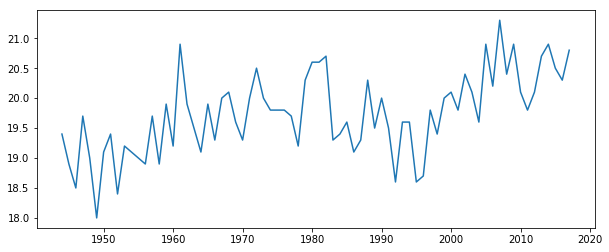

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot('Year', 'Annual', data=weather_df_int)
plt.show()

# Step2-1. Loading abalone dataset

In [10]:
headers = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
           'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'] 
raw_data = pd.read_csv(file_path, names=headers)

In [11]:
## 確認缺失值，視情況補值或刪除
raw_data.notna().all()

Sex               True
Length            True
Diameter          True
Height            True
Whole_weight      True
Shucked_weight    True
Viscera_weight    True
Shell_weight      True
Rings             True
dtype: bool

# Step2-2. Exploratory Data Analysis (EDA)

In [12]:
target_value = raw_data.Rings.sort_values().unique()
print(len(target_value), ' target values in the datasets.')
print(target_value)

28  target values in the datasets.
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29]


In [13]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [14]:
##pearson correlation
raw_data.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Sex
Length
Diameter
Height
Whole_weight
Shucked_weight
Viscera_weight
Shell_weight
Rings


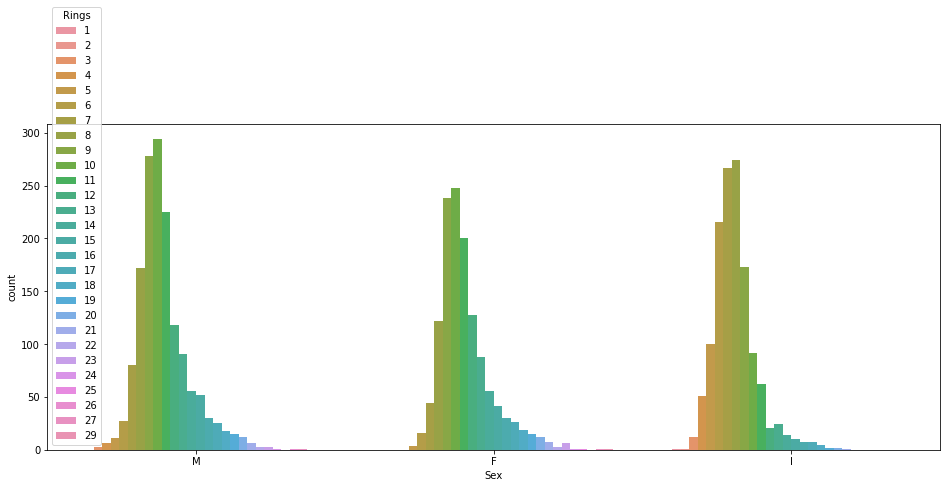

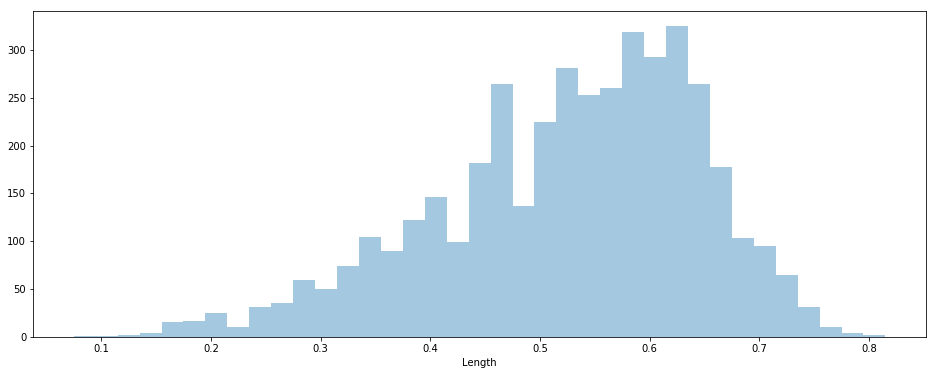

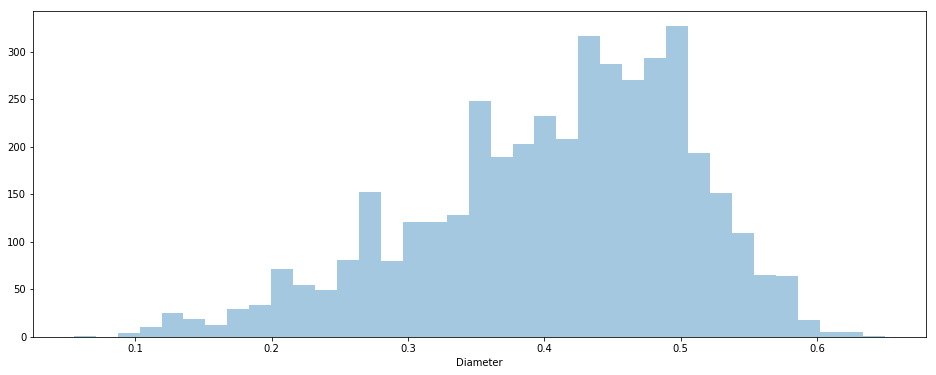

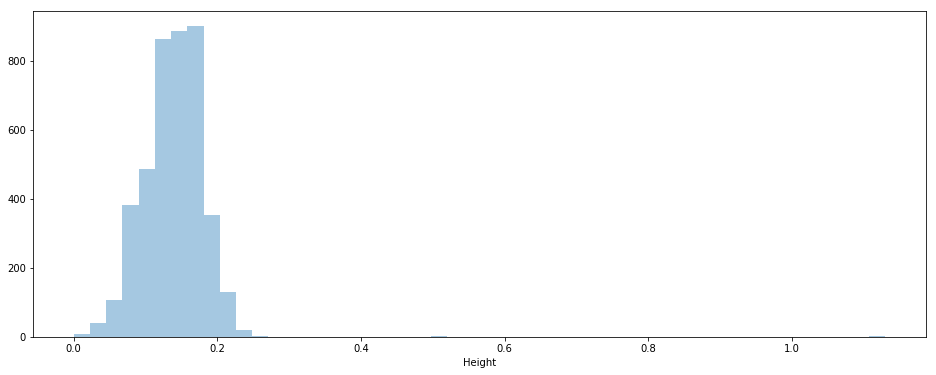

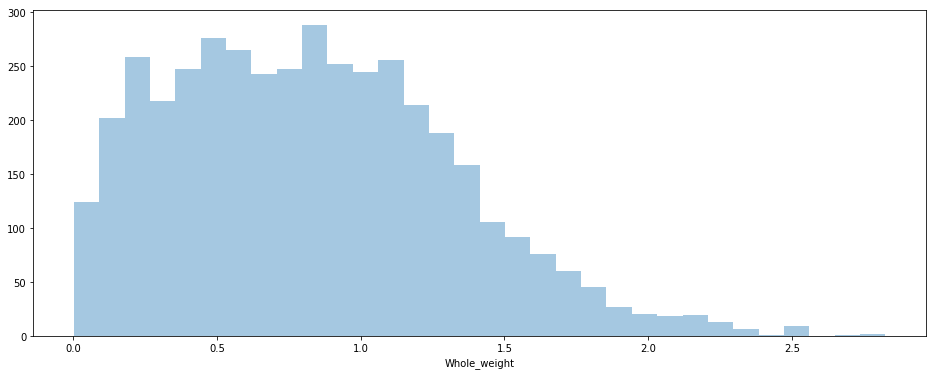

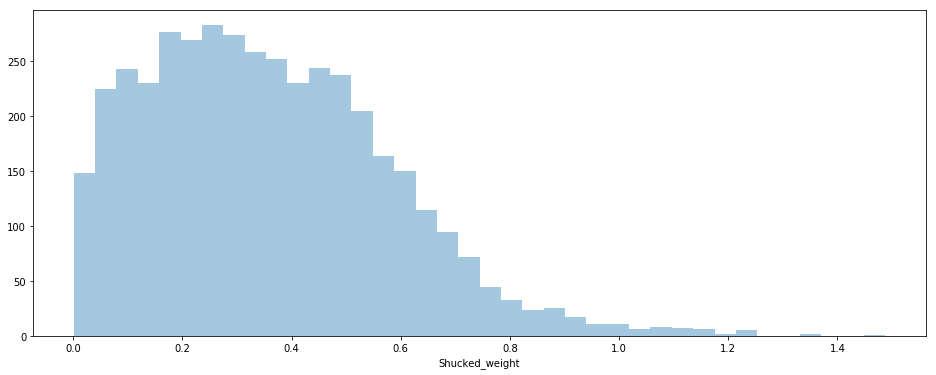

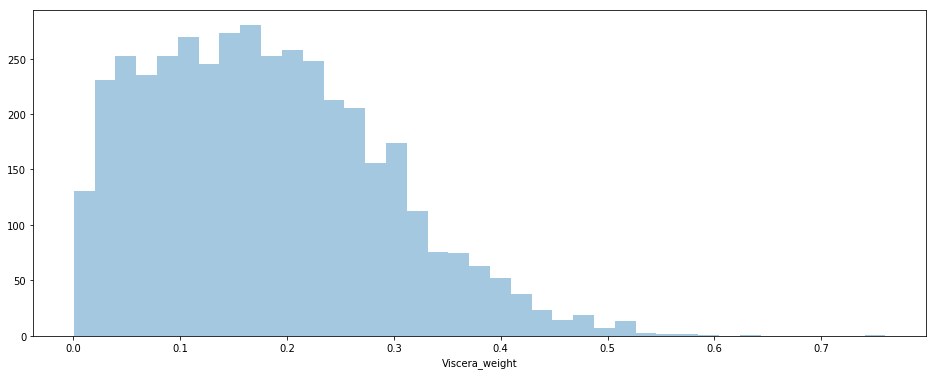

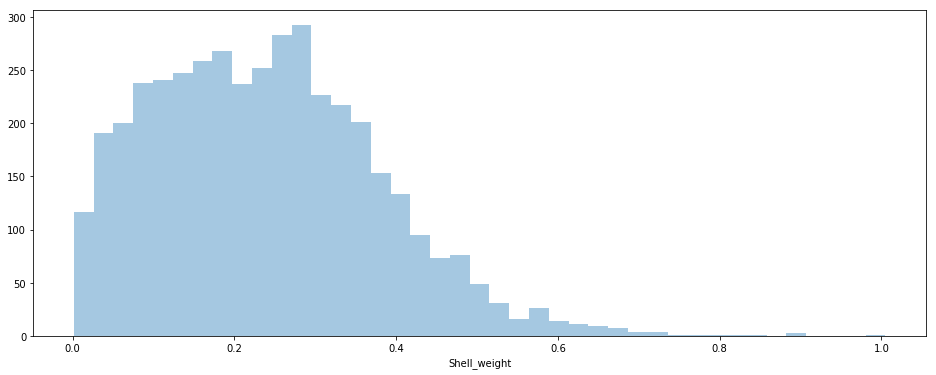

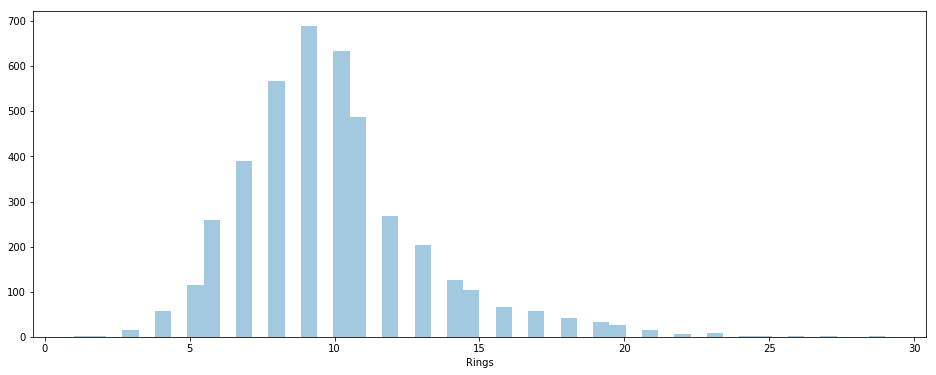

In [15]:
##observe each distribution of variable

for x in raw_data.columns:
    print(x)
    fig, ax = plt.subplots(figsize=(16, 6))
    if x == 'Sex':
        sns.countplot(x=x, hue='Rings', data=raw_data, ax=ax)
    else:
        sns.distplot(raw_data[x], kde=False, ax=ax)

plt.show()

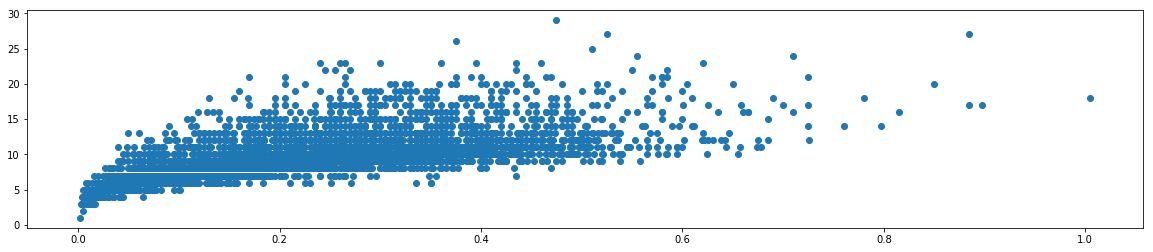

In [16]:
##most relavent is shell weight by 0.62 correlation
fig ,ax = plt.subplots(figsize=(20, 4))
plt.scatter(x=raw_data.Shell_weight, y=raw_data.Rings)
plt.show()

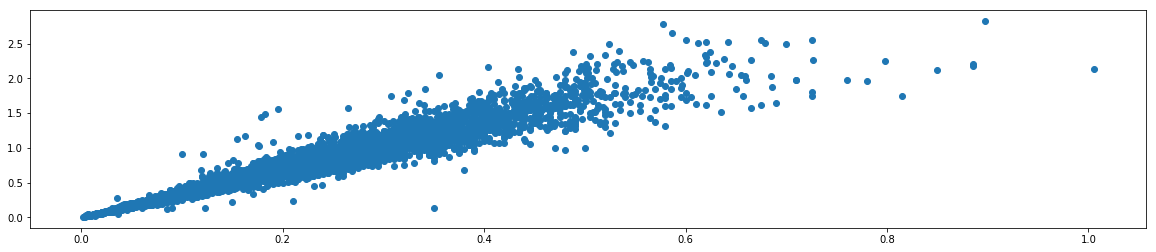

In [17]:
##see how related of Shell wight and Whole weight with 0.95 correlation
fig ,ax = plt.subplots(figsize=(20, 4))
plt.scatter(x=raw_data.Shell_weight, y=raw_data.Whole_weight)
plt.show()

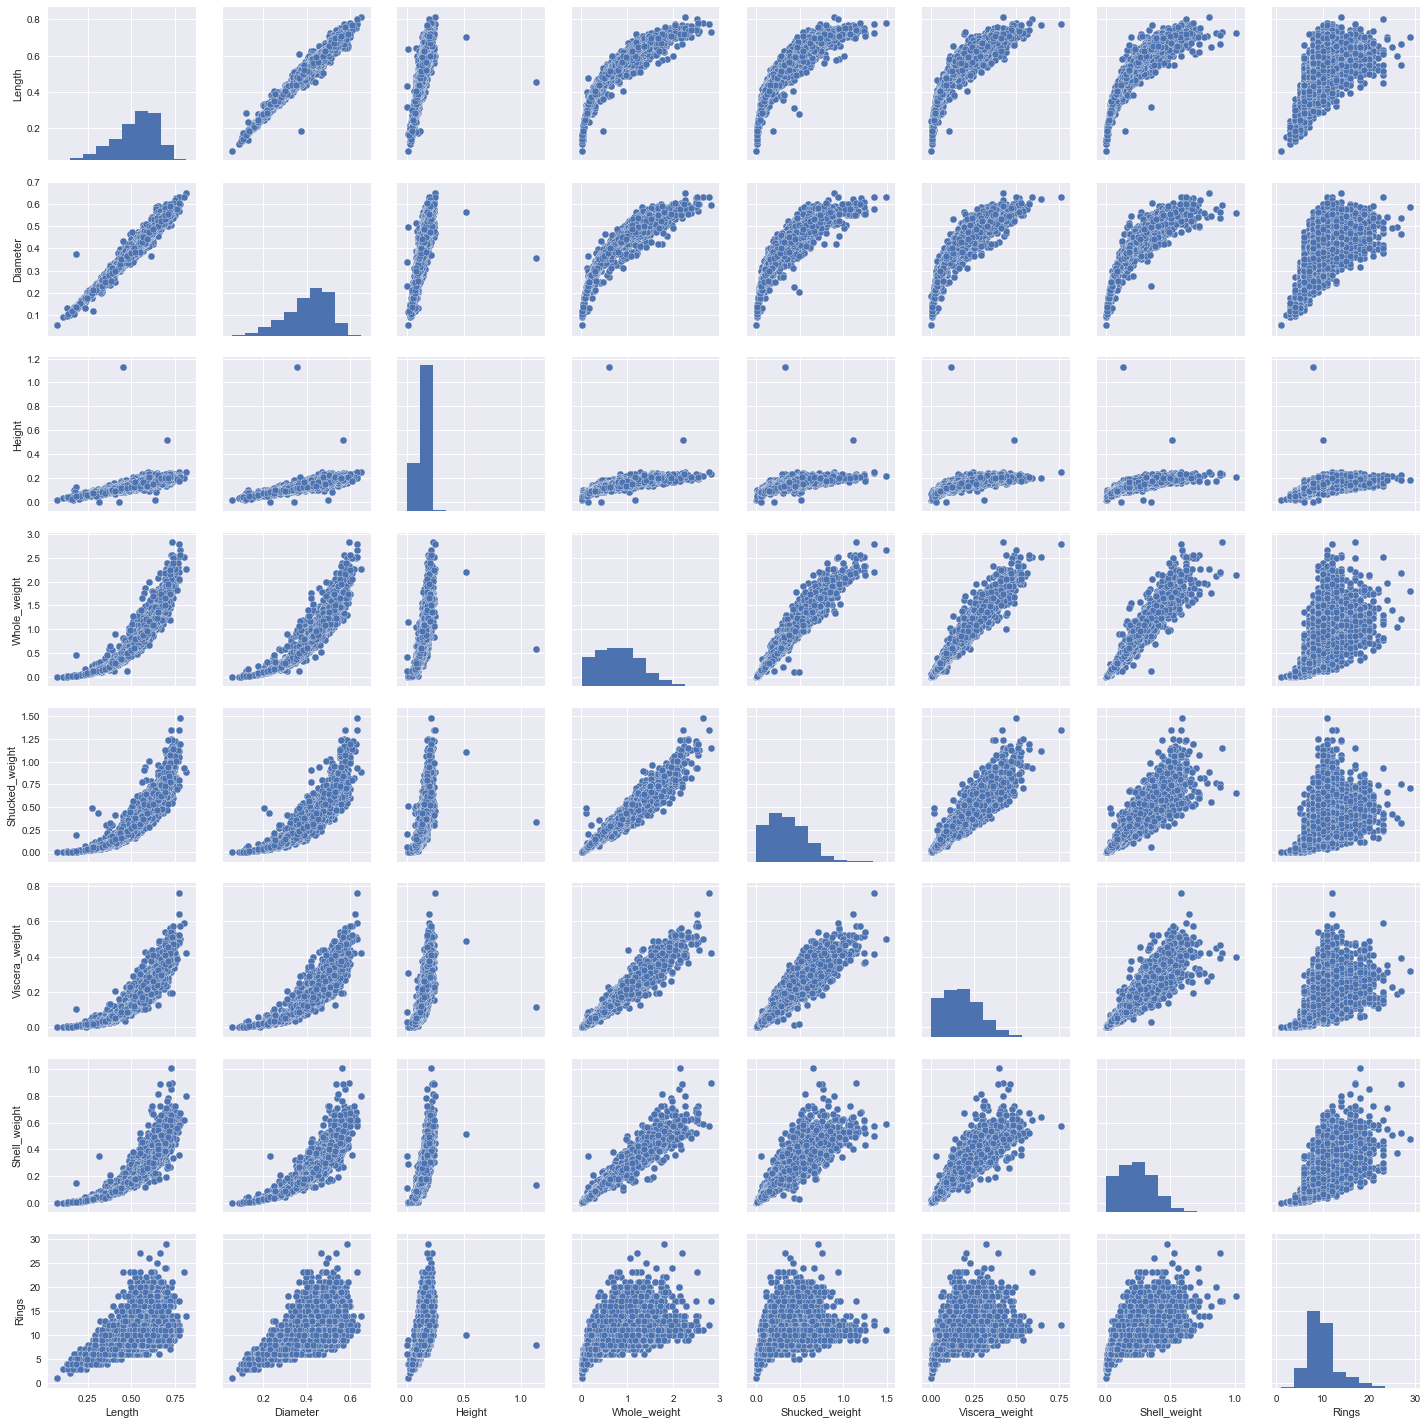

In [18]:
##pairplot each variables

sns.set()
sns.pairplot(raw_data, size=2.5)
plt.show()

# Step2-3. create rings:temp mapping dictionary

In [19]:
## rings + 1.5 = age
## 1~29 rings, so get years from 2.5 ~ 30.5 before 1994.
## for convience, just set 1.5 year as two year to take whole year 

## ex. 1 ring = 1 + 1.5 years = 2.5 years => 3 years old => average temperature from 1992 ~ 1994
## 1994 - (31 rings +2 years -1) = 1962 

weights_ring_to_year = 2
end_year = 1994
start_year = 0
ring_avg_temp_dict = {}

for ring in range(1, 41):
    print('crr ring is ', ring)
    start_year = 0    
    start_year = end_year - (ring + weights_ring_to_year - 1) 
    print('start year is ', start_year)
    temp_df = weather_df_int[(weather_df_int.Year >= start_year) & (weather_df_int.Year <= end_year)]
    print('average annual temp is ', temp_df.Annual.mean(), '\n')
    ring_avg_temp_dict[ring] = temp_df.Annual.mean()

crr ring is  1
start year is  1992
average annual temp is  19.26666666666667 

crr ring is  2
start year is  1991
average annual temp is  19.325000000000003 

crr ring is  3
start year is  1990
average annual temp is  19.46 

crr ring is  4
start year is  1989
average annual temp is  19.466666666666665 

crr ring is  5
start year is  1988
average annual temp is  19.585714285714285 

crr ring is  6
start year is  1987
average annual temp is  19.549999999999997 

crr ring is  7
start year is  1986
average annual temp is  19.5 

crr ring is  8
start year is  1985
average annual temp is  19.509999999999998 

crr ring is  9
start year is  1984
average annual temp is  19.499999999999996 

crr ring is  10
start year is  1983
average annual temp is  19.48333333333333 

crr ring is  11
start year is  1982
average annual temp is  19.576923076923073 

crr ring is  12
start year is  1981
average annual temp is  19.650000000000002 

crr ring is  13
start year is  1980
average annual temp is  19.713

In [20]:
ring_avg_temp_dict

{1: 19.26666666666667,
 2: 19.325000000000003,
 3: 19.46,
 4: 19.466666666666665,
 5: 19.585714285714285,
 6: 19.549999999999997,
 7: 19.5,
 8: 19.509999999999998,
 9: 19.499999999999996,
 10: 19.48333333333333,
 11: 19.576923076923073,
 12: 19.650000000000002,
 13: 19.713333333333335,
 14: 19.750000000000007,
 15: 19.71764705882353,
 16: 19.716666666666672,
 17: 19.72105263157895,
 18: 19.725,
 19: 19.728571428571435,
 20: 19.740909090909096,
 21: 19.773913043478267,
 22: 19.783333333333335,
 23: 19.764000000000003,
 24: 19.75769230769231,
 25: 19.770370370370376,
 26: 19.778571428571436,
 27: 19.76206896551725,
 28: 19.76666666666667,
 29: 19.74516129032259,
 30: 19.737500000000004,
 31: 19.742424242424246,
 32: 19.7764705882353,
 33: 19.76,
 34: 19.763888888888893,
 35: 19.740540540540543,
 36: 19.739473684210527,
 37: 19.717948717948723,
 38: 19.700000000000003,
 39: 19.68536585365854,
 40: 19.673809523809524}

# Step2-4. map rings to average annual temp

In [21]:
raw_with_temp = raw_data.replace({'Rings':ring_avg_temp_dict})

with_temp_cols = list(raw_data.columns[:-1])
with_temp_cols.append('Temp')

raw_with_temp.columns = with_temp_cols

In [22]:
raw_data_with_temp = pd.concat( [raw_with_temp, raw_data.Rings], axis=1)

In [23]:
raw_data_with_temp.describe(include='all').T
#kde : bool, optional
#Whether to plot a gaussian kernel density estimate.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,4177,3,M,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,4177,NaN,NaN,NaN,0.523992,0.120093,0.075,0.45,0.545,0.615,0.815
Diameter,4177,NaN,NaN,NaN,0.407881,0.0992399,0.055,0.35,0.425,0.48,0.65
Height,4177,NaN,NaN,NaN,0.139516,0.0418271,0,0.115,0.14,0.165,1.13
Whole_weight,4177,NaN,NaN,NaN,0.828742,0.490389,0.002,0.4415,0.7995,1.153,2.8255
Shucked_weight,4177,NaN,NaN,NaN,0.359367,0.221963,0.001,0.186,0.336,0.502,1.488
Viscera_weight,4177,NaN,NaN,NaN,0.180594,0.109614,0.0005,0.0935,0.171,0.253,0.76
Shell_weight,4177,NaN,NaN,NaN,0.238831,0.139203,0.0015,0.13,0.234,0.329,1.005
Temp,4177,NaN,NaN,NaN,19.5598,0.0872096,19.2667,19.5,19.51,19.5857,19.7833
Rings,4177,NaN,NaN,NaN,9.93368,3.22417,1,8,9,11,29


In [24]:
## highly related to Rings(0.77)
raw_data_with_temp.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Temp,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.255020,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.274328,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.305924,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.302274,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.187813,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.272789,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.391695,0.627574
Temp,0.255020,0.274328,0.305924,0.302274,0.187813,0.272789,0.391695,1.000000,0.777101
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,0.777101,1.000000


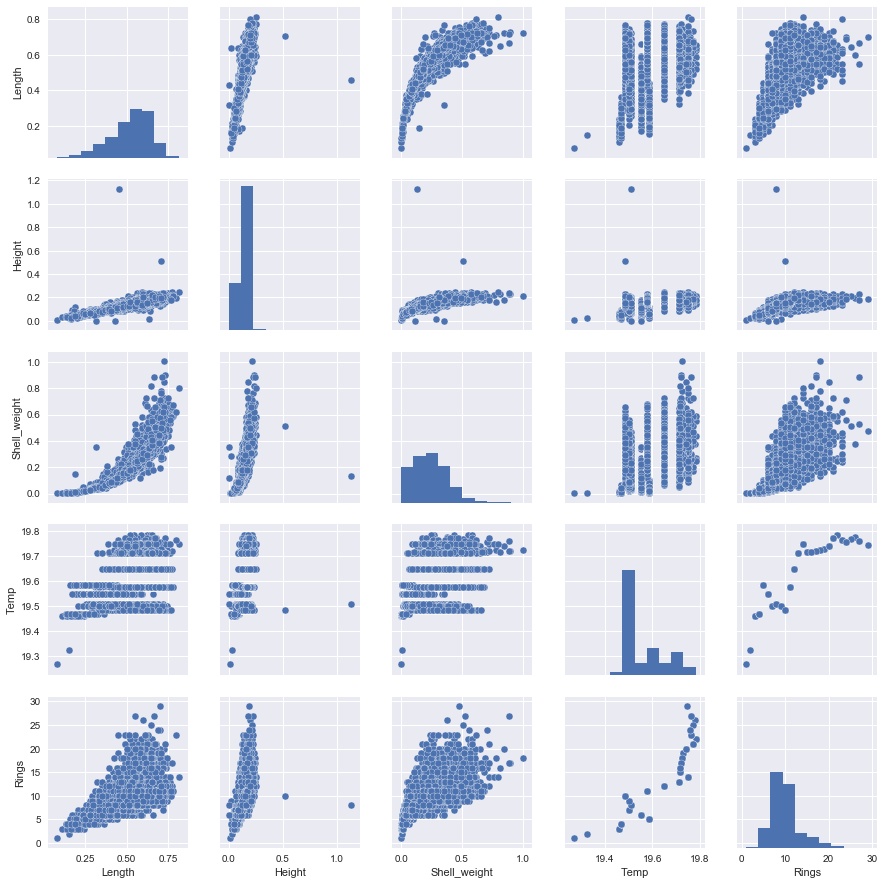

In [25]:
## choose some varibles to observe distributions
## it seems data leaks with annual avg temp & rings 

drop_col = ['Diameter', 'Shucked_weight', 'Viscera_weight', 'Whole_weight']

sns.set()
sns.pairplot(raw_data_with_temp.drop(columns=drop_col), size=2.5)
plt.show()

In [26]:
raw_data_with_temp[raw_data_with_temp.Height > 0.4]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Temp,Rings
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,19.483333,10
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,19.510000,8


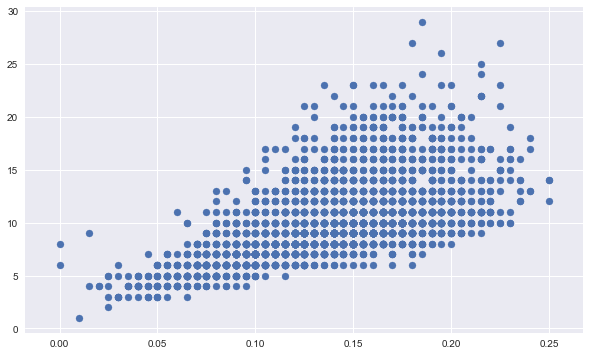

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))


outlier_filter_df = raw_data_with_temp[raw_data_with_temp.Height < 0.4]

plt.scatter(x=outlier_filter_df.Height, y=outlier_filter_df.Rings)
plt.show()

# Step3-1. Data Transformations

In [28]:
target_var = raw_data_with_temp[['Rings']]
selected_var = raw_data_with_temp.drop(columns=['Rings'])

In [29]:
#first column is Sex, so I would transform it to dummy
selected_var_conti = selected_var.iloc[:, 1:]

#Standarization
selected_var_conti = pd.DataFrame(preprocessing.scale(selected_var_conti),
                                  columns=selected_var_conti.columns)

In [30]:
selected_var_conti.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Temp
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.809989
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.685988
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.685988
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.877122
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.685988


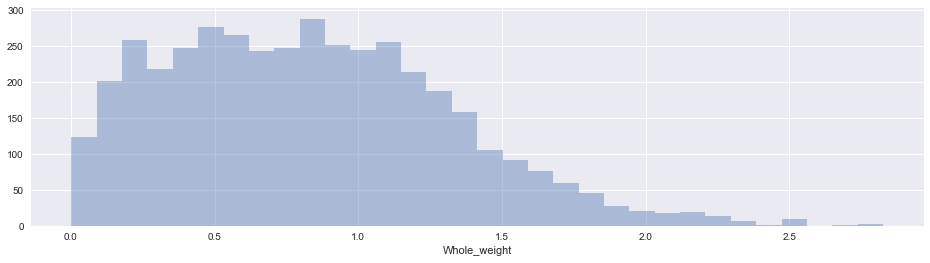

In [31]:
##check before and after standarization
fig, ax = plt.subplots(figsize=(16, 4))
sns.distplot(selected_var.Whole_weight, ax=ax, kde=False) 
plt.show()

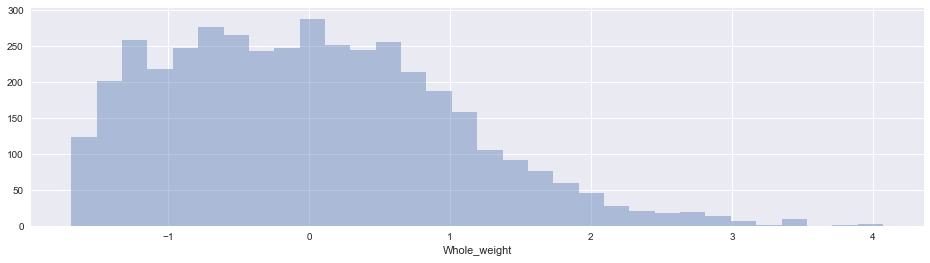

In [32]:
fig, ax = plt.subplots(figsize=[16, 4])
sns.distplot(selected_var_conti.Whole_weight, ax=ax, kde=False) 
plt.show()

# Step3-2. Dummy Variables

In [33]:
sex_dummy_df = pd.get_dummies(selected_var.Sex)

preprocess_step1_df = pd.concat([selected_var_conti, sex_dummy_df], axis=1)

In [34]:
preprocess_step1_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,-6.651770e-16,1.000120,-3.739154,-0.616198,0.174951,0.757903,2.423480
Diameter,4177.0,-3.957146e-16,1.000120,-3.556267,-0.583316,0.172519,0.726798,2.440025
Height,4177.0,5.082520e-16,1.000120,-3.335953,-0.586208,0.011563,0.609334,23.683287
Whole_weight,4177.0,1.206706e-16,1.000120,-1.686092,-0.789758,-0.059638,0.661305,4.072271
Shucked_weight,4177.0,-1.180127e-17,1.000120,-1.614731,-0.781159,-0.105289,0.642673,5.085388
Viscera_weight,4177.0,-1.817502e-16,1.000120,-1.643173,-0.794642,-0.087532,0.660635,5.286500
Shell_weight,4177.0,3.750890e-16,1.000120,-1.705134,-0.781909,-0.034708,0.647832,5.504642
Temp,4177.0,-4.714841e-14,1.000120,-3.361855,-0.685988,-0.571308,0.296983,2.563279
F,4177.0,3.129040e-01,0.463731,0.000000,0.000000,0.000000,1.000000,1.000000
I,4177.0,3.212832e-01,0.467025,0.000000,0.000000,0.000000,1.000000,1.000000


In [35]:
preprocess_step1_df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Temp,F,I,M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.809989,0,0,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.685988,0,0,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.685988,1,0,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.877122,0,0,1
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.685988,0,1,0


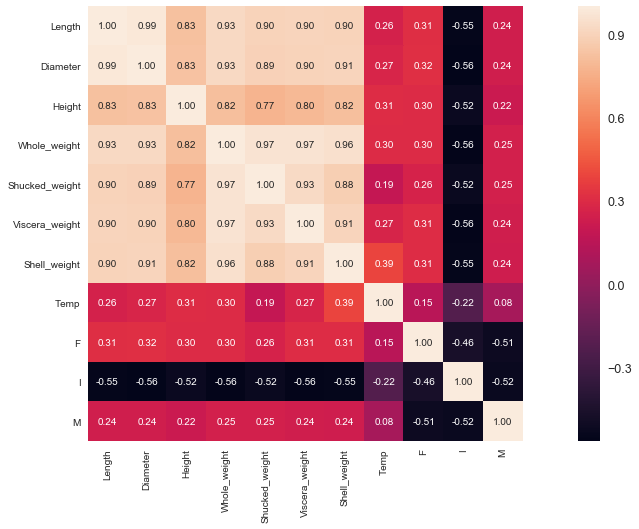

In [36]:
ax, fig = plt.subplots(figsize=(20, 8))

corr_df = preprocess_step1_df.corr()
cols = preprocess_step1_df.columns

cor_matrix = np.corrcoef(preprocess_step1_df.values.T)

sns.set(font_scale=1.25)
sns.heatmap(cor_matrix, cbar=True, annot=True, square=True, fmt='.2f', 
            annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()

In [37]:
preprocess_step1_df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Temp,F,I,M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.255020,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.274328,0.318626,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.305924,0.298421,-0.518552,0.215459
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.302274,0.299741,-0.557592,0.252038
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.187813,0.263991,-0.521842,0.251793
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.272789,0.308444,-0.556081,0.242194
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.391695,0.306319,-0.546953,0.235391
Temp,0.255020,0.274328,0.305924,0.302274,0.187813,0.272789,0.391695,1.000000,0.145412,-0.224405,0.077578
F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.145412,1.000000,-0.464298,-0.512528
I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.224405,-0.464298,1.000000,-0.522541


# Step3-3. Drop some columns of high correlation

In [38]:
preprocess_step2_df = preprocess_step1_df.drop(columns=['Diameter', 'Shucked_weight', 
                                                        'Viscera_weight', 'Whole_weight'])

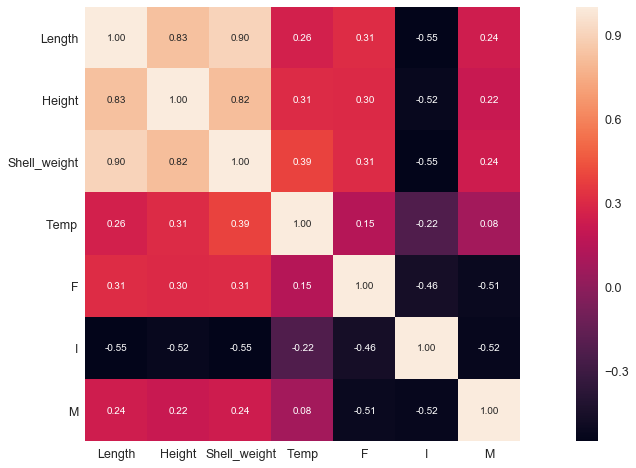

In [39]:
ax, fig = plt.subplots(figsize=(20, 8))

corr_df = preprocess_step2_df.corr()
cols = preprocess_step2_df.columns

cor_matrix = np.corrcoef(preprocess_step2_df.values.T)

sns.set(font_scale=1.25)
sns.heatmap(cor_matrix, cbar=True, annot=True, square=True, fmt='.2f', 
            annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()

## gap of statsmodel vs scikit-learn

## use aic to check complexity

#### http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

# Step4-1. Training & Testing Model

In [40]:
## cross validation by Support Vector Regression (SVR)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import svm

#try to drop temperature variable, the result would be worse
#training_data = preprocess_step2_df.drop(columns='Temp').copy()
training_data = preprocess_step2_df.copy()

clf = svm.SVR()
scores = cross_val_score(clf, X=training_data, y=target_var.Rings.ravel(), cv=5, n_jobs=4, scoring='neg_mean_squared_error')
scores

array([-4.67821377, -0.90139223, -2.3312369 , -1.24440244, -1.16819345])

In [41]:
scores.mean()

-2.064687755690678

# Support Vector Regression (SVR)

In [42]:
##try to calculate accurancy
random_seed = 7

X_train, X_test, y_train, y_test = train_test_split(training_data, target_var, 
                                                    test_size=0.2, random_state=random_seed)

In [43]:
clf = svm.SVR()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
mean_squared_error(y_test, y_predict)

D:\Users\chungyitseng\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.1992366896272637

In [44]:
y_train_lst = [ x[0] for x in y_train.get_values()]
y_test_lst = [ x[0] for x in y_test.get_values()]

In [45]:
## calculate accurancy by round the prediction
## TODO: ADD RECALL

print(len(y_train_lst), ' training data')
cnt = 0

y_train_predict = clf.predict(X_train)

for pred, test in zip(y_train_predict, y_train_lst):
    if round(pred) != test:
        cnt = cnt + 1
        
print(cnt, ' err counts')
print('Acc', 1 - (cnt/len(y_train_lst)))

3341  training data
1846  err counts
Acc 0.44747081712062253


In [46]:


print(len(y_test_lst), ' test data')
cnt = 0

y_test_predict = clf.predict(X_test)

for pred, test in zip(y_test_predict, y_test_lst):
    if round(pred) != test:
        cnt = cnt + 1
        
print(cnt, ' err counts')
print('Acc', 1 - (cnt/len(y_test_lst)))

836  test data
495  err counts
Acc 0.4078947368421053


# Ridge Regression

In [47]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.5)

reg.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
reg_predict = reg.predict(X_test)

print('Mean Squared Err(RMSE)')
mean_squared_error(y_test, reg_predict)

Mean Squared Err(RMSE)


2.715648394239874

In [49]:
print(len(y_train_lst), ' training data')
cnt = 0

y_train_predict = reg.predict(X_train)

for pred, test in zip(y_train_predict, y_train_lst):
    if round(pred[0]) != test:
        cnt = cnt + 1
        
print(cnt, ' err counts')
print('Acc', 1 - (cnt/len(y_train_lst)))

3341  training data
2402  err counts
Acc 0.28105357677342113


In [50]:
print(len(y_test_lst), ' test data')
cnt = 0

y_test_predict = reg.predict(X_test)

for pred, test in zip(y_test_predict, y_test_lst):
    if round(pred[0]) != test:
        cnt = cnt + 1
        
print(cnt, ' err counts')
print('Acc', 1 - (cnt/len(y_test_lst)))

836  test data
591  err counts
Acc 0.2930622009569378


In [51]:
X_train.describe()

,Length,Height,Shell_weight,Temp,F,I,M
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.007409,0.011313,0.009562,-0.006731,0.313080,0.322359,0.364562
std,1.003270,1.023106,1.003576,0.997415,0.463816,0.467449,0.481379
min,-3.739154,-3.335953,-1.705134,-3.361855,0.000000,0.000000,0.000000
25%,-0.616198,-0.586208,-0.778317,-0.685988,0.000000,0.000000,0.000000
50%,0.174951,0.131117,-0.027523,-0.571308,0.000000,0.000000,0.000000
75%,0.757903,0.609334,0.655017,0.296983,1.000000,1.000000,1.000000
max,2.423480,23.683287,5.504642,2.563279,1.000000,1.000000,1.000000


In [52]:
X_train.columns

Index(['Length', 'Height', 'Shell_weight', 'Temp', 'F', 'I', 'M'], dtype='object')

In [53]:
## temperature is the highest estimator 
reg.coef_

array([[ 0.82357188,  0.22002394,  0.09383003,  2.09726698,  0.20254927,
        -0.42754106,  0.22499178]])